## **STEP-1: IMPORTING LIBRARIES AND DATA**

### **INSTALLING HEARTPY LIBRARY**

In [1]:
pip install heartpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### **IMPORTING BASIC LIBRARIES**

In [85]:
import pandas as pd
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### **IMPORTING MACHINE LEARNING LIBRARIES**

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [5]:
data_raw = pd.read_csv("ECG_training.csv", index_col=[0])
data_raw.head(5)

,0,1,2,3,4,5,6,7,8,9,...,8991,8992,8993,8994,8995,8996,8997,8998,8999,Classification
0,-127,-162,-197,-229,-245,-254,-261,-265,-268,-268,...,19,8,0,-7,-12,-15,-18,-22,-21,N
1,128,157,189,226,250,257,262,265,268,269,...,-5,-3,-2,-1,-1,0,0,1,2,N
2,519,619,723,827,914,956,955,934,920,900,...,1144,1055,866,632,403,224,116,17,18,A
3,-266,-316,-367,-407,-423,-423,-401,-367,-329,-305,...,74,73,69,68,66,62,51,34,21,N
4,21,22,24,26,28,31,32,34,34,35,...,-456,-263,-46,133,227,257,236,174,84,N


In [6]:
data_pass1 = pd.get_dummies(data_raw, columns = ['Classification'], drop_first=True)
data_pass1

,0,1,2,3,4,5,6,7,8,9,...,8991,8992,8993,8994,8995,8996,8997,8998,8999,Classification_N
0,-127,-162,-197,-229,-245,-254,-261,-265,-268,-268,...,19,8,0,-7,-12,-15,-18,-22,-21,1
1,128,157,189,226,250,257,262,265,268,269,...,-5,-3,-2,-1,-1,0,0,1,2,1
2,519,619,723,827,914,956,955,934,920,900,...,1144,1055,866,632,403,224,116,17,18,0
3,-266,-316,-367,-407,-423,-423,-401,-367,-329,-305,...,74,73,69,68,66,62,51,34,21,1
4,21,22,24,26,28,31,32,34,34,35,...,-456,-263,-46,133,227,257,236,174,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,347,378,410,540,695,736,751,778,849,803,...,241,267,252,115,10,1,37,26,-80,1
3496,-59,-71,-87,-104,-111,-114,-117,-119,-120,-121,...,120,92,63,32,16,7,2,0,-4,1
3497,-60,-83,-106,-128,-145,-155,-163,-168,-173,-177,...,52,47,42,34,18,5,-5,-8,-9,1
3498,582,702,807,893,962,997,984,945,927,915,...,-25,-23,-13,-38,-65,-65,-50,-42,-46,1


## **PART-2: EDA Analysis and Feature Extraction**

### **COUNTING NULL VALUES**

In [7]:
data_pass1.isnull().sum()

0                   0
1                   0
2                   0
3                   0
4                   0
                   ..
8996                0
8997                0
8998                0
8999                0
Classification_N    0
Length: 9001, dtype: int64

### **FEATURE EXTRACTION**

In [8]:
data_pass2 = []
for i in range(0, 3500):
    wp, measures = hp.process(data_pass1.iloc[i, :-1], sample_rate = 300.0, clean_rr = True,clean_rr_method='z-score',bpmmax=2000,bpmmin=-1000)
    values = [i for i in list(measures.values())]
    data_pass2.append(np.array(values[0:-1]))
data_pass2 = np.array(data_pass2)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\user\AppData\Local\Temp\ipykernel_23576\4272339245.py:5: UserWarning: Warning: converting a masked element to nan.
  data_pass2.append(np.a

### **ADDING LAST COLUMN**

In [9]:
data_pass3 = pd.DataFrame(data_pass2)
data_pass3['Classification'] = data_pass1['Classification_N']
data_pass3.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,Classification
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864,1
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483,1
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574,0
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888,1
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504,1


### **REMOVING NULLS**

In [10]:
data_pass3.isna().sum()

0                  10
1                  10
2                  10
3                  68
4                  68
5                  68
6                  68
7                  10
8                  68
9                  68
10                 68
11                231
Classification      0
dtype: int64

In [11]:
data_pass4 = data_pass3.dropna()
data_pass4.isnull().sum()

0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
Classification    0
dtype: int64

### **REPLACING INFINITELY LARGE VALUES**

In [34]:
data_pass5 = data_pass4.replace((np.inf, -np.inf, np.nan), np.nan).reset_index(drop=True)
data_pass5.dropna(inplace=True)
data_pass5


,0,1,2,3,4,5,6,7,8,9,10,11,Classification
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864,1
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483,1
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574,0
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888,1
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,277.877698,215.922330,142.097807,118.393358,210.230370,0.946809,0.861702,116.666667,148.653017,125.457157,58589.398821,1.184891,1
3265,183.073011,327.738095,151.683813,98.921107,254.435587,0.976744,0.953488,131.666667,179.874513,121.474451,68644.295126,1.480760,1
3266,237.105751,253.051643,196.085117,150.753119,328.476105,0.931034,0.931034,176.666667,231.333854,150.012969,109022.935841,1.542092,1
3267,82.389289,728.250000,42.752437,7.964698,14.088950,0.108108,0.000000,18.333333,9.789606,57.033645,1754.067054,0.171646,1


### **CHECKING FOR IMBALANCE IN DATASET AND BALANCING IT**

In [35]:
data_pass5.value_counts('Classification')

Classification
1    2865
0     402
dtype: int64

In [36]:
smote_balancer = SMOTE(sampling_strategy='minority')
X_balanced, Y_balanced = smote_balancer.fit_resample(data_pass5.drop('Classification', axis=1), data_pass5['Classification'])

In [41]:
data_pass6 = pd.DataFrame(X_balanced)
data_pass6['Classification'] = Y_balanced
data_pass6

,0,1,2,3,4,5,6,7,8,9,10,11,Classification
0,78.965597,759.824561,32.308341,13.039216,23.466009,0.411765,0.029412,26.666667,16.585877,43.207663,2251.381471,0.383864,1
1,358.096197,167.552743,144.744509,140.973203,223.148951,0.893939,0.803030,103.333333,157.705144,138.037173,68389.871397,1.142483,1
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,89641.686245,0.845574,0
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,104148.063640,1.952888,1
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,4568.346982,0.302504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,141.303729,425.311547,158.433293,140.284849,253.904568,0.895792,0.883611,106.616956,178.706155,101.846894,55818.007689,1.822692,0
5726,99.078065,629.841052,111.406827,90.180824,147.888124,0.848684,0.661670,88.087074,104.439996,116.198283,37869.320909,0.910865,0
5727,196.930645,309.018596,172.397470,146.851468,271.641547,0.913915,0.816843,134.721917,191.986030,153.298848,92469.988505,1.252347,0
5728,86.984788,746.031269,132.585040,107.199920,234.424149,0.950186,0.852421,118.763835,165.144165,112.240481,58231.537424,1.471375,0


In [43]:
data_pass6.value_counts('Classification')

Classification
0    2865
1    2865
dtype: int64

### **SCALING THE DATA**

CHECKING WHICH SCALING WORKS BEST ON THE DATA

In [44]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

X_scaled1 = scaler_minmax.fit_transform(X_balanced)
X_scaled2 = scaler_standard.fit_transform(X_balanced)
X_scaled3 = scaler_robust.fit_transform(X_balanced)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feat

### **DEFINING MODELS AND THEIR HYPERPARAMETERS**

In [56]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM_Classifier': SVC(),
    'KNN_Classifier': KNeighborsClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier()
}

model_params = {
    'LogisticRegression': {
        'penalty': ['l1', 'none'],
        'C': [10, 100, 1000]
    },
    'DecisionTreeClassifier': {
        'max_depth': [5, 10, 20]
    },
    'RandomForestClassifier': {
        'n_estimators': [30, 65, 100],
        'max_depth': [5, 10, 20]
    },
    'SVM_Classifier': {
        'kernel': ['linear', 'poly', 'rbf'],
        'degree': [1, 2],
        'C': [10, 100, 1000]
    },
    'KNN_Classifier': {
        'n_neighbors': [20, 50, 80],
        'weights': ['uniform', 'distance'],
        'metric': ['manhattan', 'euclidean']
    },
    'ExtraTreesClassifier': {
        'n_estimators': [30, 65, 100],
        'max_depth': [5, 10, 20]
    }
}

In [60]:
scores = []
for i in models:
    scores_list = []
    scores_list.append(round(cross_val_score(models[i], X_scaled1, Y_balanced, cv=5, scoring='f1').mean(), 2))
    scores_list.append(round(cross_val_score(models[i], X_scaled2, Y_balanced, cv=5, scoring='f1').mean(), 2))
    scores_list.append(round(cross_val_score(models[i], X_scaled3, Y_balanced, cv=5, scoring='f1').mean(), 2))
    scores.append(scores_list)
scores = np.array(scores)
scores

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

AS ALL SCALINGs ARE GIVING AN EQUAL F1 SCORE FOR ALL MODELS, WE SHALL USE MIN_MAX SCALING (MINIMUM COMPUTATION)

## **STEP-3: MODEL TRAINING**

### **HYPERPARAMETER TUNING**

In [62]:
for i in models:
    current_model = GridSearchCV(models[i], model_params[i], cv = 5, scoring = 'f1')
    current_model.fit(X_scaled1, Y_balanced)
    print('BEST SCORE FOR {} is {}'.format(i, round(100*current_model.best_score_, 2)))
    print('Best parameters:', current_model.best_params_)
    print()


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1

BEST SCORE FOR LogisticRegression is 100.0
Best parameters: {'C': 10, 'penalty': 'none'}

BEST SCORE FOR DecisionTreeClassifier is 100.0
Best parameters: {'max_depth': 5}

BEST SCORE FOR RandomForestClassifier is 100.0
Best parameters: {'max_depth': 5, 'n_estimators': 30}

BEST SCORE FOR SVM_Classifier is 100.0
Best parameters: {'C': 10, 'degree': 1, 'kernel': 'linear'}

BEST SCORE FOR KNN_Classifier is 100.0
Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

BEST SCORE FOR ExtraTreesClassifier is 100.0
Best parameters: {'max_depth': 5, 'n_estimators': 30}



AS ALL THE MODELS ARE GIVING A PERFECT F1_SCORE, WE WILL TRAIN, TEST AND EXPORT THE SVM CLASSIFIER BECAUSE IT'S THE FASTEST CLASSIFIER AMONGST THE CHOSEN CLASSIFIERS

### **SPLITTING TRAINING AND TESTING DATA**

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled1, Y_balanced, test_size=0.35, stratify=Y_balanced, random_state=453)

In [71]:
print(Y_test.value_counts(0))
print(Y_train.value_counts(0))

0    1003
1    1003
Name: Classification, dtype: int64
0    1862
1    1862
Name: Classification, dtype: int64


In [75]:
SVM_predictor = models['SVM_Classifier']
SVM_predictor.fit(X_train, Y_train)
predictions = SVM_predictor.predict(X_test)
actual = Y_test


## **STEP-4: CLASSIFICATION REPORT**

### **ACCURACY, F1, PRECISION, RECALL SCORES**

In [80]:
print('Accuracy Score:\t\t {}%'.format(round(100*accuracy_score(actual, predictions), 2)))
print('Precision Score:\t {}%'.format(round(100*precision_score(actual, predictions), 2)))
print('Recall Score:\t\t {}%'.format(round(100*recall_score(actual, predictions), 2)))
print('F1 Score:\t\t {}%'.format(round(100*f1_score(actual, predictions), 2)))

Accuracy Score:		 100.0%
Precision Score:	 100.0%
Recall Score:		 100.0%
F1 Score:		 100.0%


### **CONFUSION MATRIX**

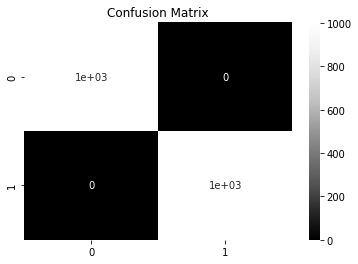

In [84]:
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(actual, predictions), cmap='Greys_r', annot=True)
plt.show()

## **STEP-5: EXPORTING THE MODEL**

In [86]:
modelfile = open('SVM_Classifier', 'ab')
pickle.dump(SVM_predictor, modelfile)
modelfile.close()

scalerfile = open('MinMaxScaler', 'ab')
pickle.dump(scaler_minmax, scalerfile)
scalerfile.close()

## **STEP-6: FUNCTION TO PREDICT HEART DISEASE BASED ON CSV_FILE (AND REPORT CLASSIFICATION)**

In [99]:
def heart_predictions(filepath):
    #READING DATA
    data_raw = pd.read_csv(filepath)
    #PASS-1
    data_pass1 = pd.get_dummies(data_raw, columns = ['Classification'], drop_first=True)
    #PASS-2
    data_pass2 = []
    for i in range(0, 3500):
        wp, measures = hp.process(data_pass1.iloc[i, :-1], sample_rate = 300.0, clean_rr = True,clean_rr_method='z-score',bpmmax=2000,bpmmin=-1000)
        values = [i for i in list(measures.values())]
        data_pass2.append(np.array(values[0:-1]))
    data_pass2 = np.array(data_pass2)
    #PASS-3
    data_pass3 = pd.DataFrame(data_pass2)
    data_pass3['Classification'] = data_pass1['Classification_N']
    #PASS-4
    data_pass4 = data_pass3.dropna()
    data_pass4.isnull().sum()
    #PASS-5
    data_pass5 = data_pass4.replace((np.inf, -np.inf, np.nan), np.nan).reset_index(drop=True)
    data_pass5.dropna(inplace=True)
    #BALANCING
    smote_balancer = SMOTE(sampling_strategy='minority')
    X_balanced, Y_balanced = smote_balancer.fit_resample(data_pass5.drop('Classification', axis=1), data_pass5['Classification'])
    data_pass6 = pd.DataFrame(X_balanced)
    data_pass6['Classification'] = Y_balanced
    #LOADING PICKLED FILES
    our_SVM_Classifier = pickle.load(open('SVM_Classifier', 'rb'))
    our_MinMaxScaler = pickle.load(open('MinMaxScaler', 'rb'))
    #SCALING DATA
    X_scaled = our_MinMaxScaler.transform(X_balanced)
    #MAKING PREDICTIONS
    Y_predictions = our_SVM_Classifier.predict(X_scaled)
    #RETURNING F1_SCORE
    print("F1 Score of the SVM Classifier on our data is: ", f1_score(Y_balanced, Y_predictions))
    return Y_predictions

### **TESTING ON OUR TRAINING DATA FILE**

In [100]:
heart_predictions('ECG_Training.csv')

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\user\AppData\Local\Temp\ipykernel_23576\2682068591.py:11: UserWarning: Warning: converting a masked element to nan.
  data_pass2.append(np.

F1 Score of the SVM Classifier on our data is:  1.0


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)